# KNN from Scratch

Using the KNN algorithm from scikit-learn is quite simple. When you use it, you don't even need to know how KNN works and classifies the data points. The goal should be to really understand what you are doing. This is the only way to make sure you understand when something doesn't go the way you expect or want it to. Many people remember things best when they implement them themselves. So, let's build our own K-Nearest-Neighbors classifier!

**The purpose of this notebook is to help you remember the steps necessary to classify samples with KNN.**

To test if your code works, you can use the Iris dataset as a data example.
Let's make a plan and break this big task into smaller steps!


1. What information and data does the algorithm need to train and predict the classes of new instances?
This will be the input for our function! 

2. calculate the distance between the test point and each existing data point in the training data.
3. determine the nearest k neighbors.
4. make predictions based on these neighbors.

You have already implemented a function to calculate the distance between points, which will now come in handy.

A good way to get started, is to ignore the syntax and just write in simple text what you want your program to do aka **write pseudo-code**. You can then start to build out some of the structure. What variables are you going to need? What kinds of logic? 
Knowing where you’re going can help you make fewer mistakes as you’re trying to get there.

Note that for large data sets, the algorithm can take very long to classify because it has to calculate the distance between the test point and every other point in the data!

You can check if your pseudo-code contains all necessary steps afterwards, when scrolling down to "KNN algorithm from scratch" where you find an example of a knn pseudo-code.

## Import and Setup

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load data
df = pd.read_csv('data/iris.csv')

In [3]:
# Defining X and y 

x = df.drop(columns=['species'])
y = df.species

y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=15)


## Distance Metrics

As already explained, KNN assigns a class to the test point based on the majority class of  K  nearest neighbors. In general, euclidean distance is used to find nearest neighbors, but other distance metrics can also be used.

As the dimensionality of the feature space increases, the euclidean distance often becomes problematic due to the curse of dimensionality (discussed later).

In such cases, alternative vector-based similarity measures (dot product, cosine similarity, etc) are used to find the nearest neighbors. This transforms the original metric space into one more amicable to point-to-point measurements.

Another distance measure that you might consider is [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance). Mahalanobis distance attempts to weight features according to their probabilities. On some data sets that may be important.

In general, it's probably a good idea to normalize the data at a minimum. Here's a link to the scikit-learn scaling package: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html . You have to be a little circumspect about employing any technique where the answers change with scaling.

In [5]:
# Implemented own distance function from scratch

def distance(vec1, vec2, c=2, verbose=True):
    if len(vec1) != len(vec2):
        raise ValueError("Vectors must be of the same length")

    # Calculate Minkowski distance
    distance = np.power(np.sum(np.abs(np.array(vec1) - np.array(vec2)) ** c), 1/c)

    # Verbose output
    if verbose:
        if c == 1:
            print("Distance metric: Manhattan")
        elif c == 2:
            print("Distance metric: Euclidean")
        else:
            print(f"Distance metric: Minkowski with c={c}")

    return distance


## KNN Algorithm from scratch


Remember the steps:

1. What information and data does the algorithm need to train and predict the classes of new instances?
This will be the input for our function! 

2. calculate the distance between the test point and each existing data point in the training data.
3. determine the nearest k neighbors.
4. make predictions based on these neighbors.

Hopefully you have already thought of your gameplan, also called pseudo-code. If so, you can compare it to this one:
```
INPUT: X_train, y_train, X_test, k
FOR each object_to_predict in X_test:
    FOR each training_point, index in X_train:
        calculate distance d between object_to_predict and training_point
        store d and index
    SORT distances d in increasing order
    take first k items, get indices of those
    calculate most common class of points at indices in y_train (prediction)
    store prediction
RETURN list of predictions
````

Time to code!
Don't forget that it's good practice to document your own code! This way you can later understand what the purpose of each step was.
Maybe you can even use your pseudo code as documentation :)

In [6]:
# Your code

from collections import Counter

def knn_predict_one(x_train, y_train, x_test_point, k=5, c=2):
    """
    Predict the label for a single test point using KNN.

    Parameters
    ----------
    x_train : pd.DataFrame or np.ndarray
        Training features of shape (n_train, n_features).
    y_train : pd.Series or np.ndarray
        Training labels of shape (n_train,).
    x_test_point : pd.Series or np.ndarray
        A single test sample of shape (n_features,).
    k : int
        Number of neighbors.
    c : float
        Minkowski order (1=Manhattan, 2=Euclidean).

    Returns
    -------
    predicted_label
        The majority-vote label among the k nearest neighbors.
    """
    # Convert to numpy arrays for consistent math
    Xtr = np.asarray(x_train)
    ytr = np.asarray(y_train).ravel()
    xt = np.asarray(x_test_point)

    # Compute distance from test point to every training point
    distances = []
    for i in range(len(Xtr)):
        d = distance(xt, Xtr[i], c=c, verbose=False)
        distances.append((d, i))  # store distance + index

    # Sort by distance (smallest first)
    distances.sort(key=lambda x: x[0])

    # Take indices of k nearest
    k_indices = [idx for (_, idx) in distances[:k]]

    # Majority vote
    k_labels = ytr[k_indices]
    predicted_label = Counter(k_labels).most_common(1)[0][0]

    return predicted_label


In [7]:
# predict many test points

def knn_predict(x_train, y_train, x_test, k=5, c=2):
    """
    Predict labels for multiple test points using KNN.
    Returns a numpy array of predictions.
    """
    Xte = np.asarray(x_test)
    preds = [knn_predict_one(x_train, y_train, Xte[i], k=k, c=c) for i in range(len(Xte))]
    return np.array(preds)


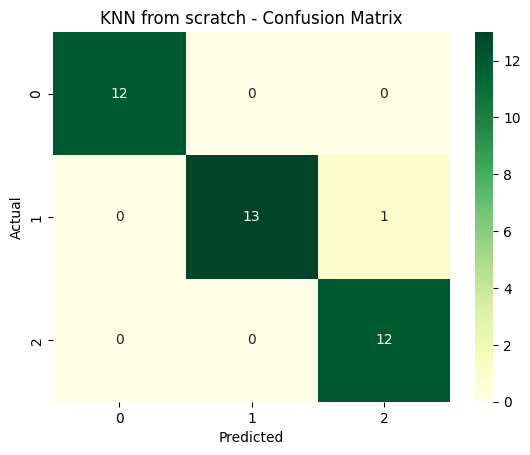

In [9]:
# use the functions on the iris dataset

import seaborn as sns
import matplotlib.pyplot as plt

y_pred_scratch = knn_predict(x_train, y_train, x_test, k=5, c=2)

cm = confusion_matrix(y_test, y_pred_scratch)
sns.heatmap(cm, annot=True, cmap="YlGn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN from scratch - Confusion Matrix")
plt.show()


In [10]:
# conpute accuracy

from sklearn.metrics import accuracy_score
print("Accuracy (scratch):", accuracy_score(y_test, y_pred_scratch))

Accuracy (scratch): 0.9736842105263158


## Comparison with sklearn knn implementation

That will be interesting! Check out how your implementation performs in comparison to the one of sklearn!
You can check the confusion matrix and the accuracy score of both algorithms.
If you want, you can check which algorithm is faster!

In [11]:
# Your code

# compare with scikit-learn KNN

knn_sk = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)  # p=2 == Euclidean
knn_sk.fit(x_train, y_train)
y_pred_sk = knn_sk.predict(x_test)

print("Accuracy (sklearn):", accuracy_score(y_test, y_pred_sk))
print("Same predictions?:", np.all(y_pred_scratch == y_pred_sk))


Accuracy (sklearn): 0.9736842105263158
Same predictions?: True
